## Exploring the Gasoline Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats
%matplotlib inline


In [2]:
# read in the 
concat_df = pd.read_csv('../../data/02_intermediate/routine_clean.csv')
concat_df.head()

/Users/Kate/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
0,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Antiknock Index,,R+M/2,89.8,87,,Y
1,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",API Gravity,,D4052,60.9,,,None
2,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",DIPE,Vol. %,D4815,ND,,,None
3,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 10%,Deg. C,D86,43.1,,,Y
4,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 20%,Deg. C,D86,51.0,,,None


In [3]:
concat_df.Prod.unique()

array(['Gasoline', 'Diesel', 'Kerosene', 'E-85 Fuel Ethanol',
       'Biodiesel Blend', 'Aviation Gasoline', 'Denat. Fuel EtOH',
       'Jet Fuel', 'Ethanol Flex Fuel', 'Gasoline Blend Stock',
       'Fuel Oils'], dtype=object)

In [4]:
gasoline_df = concat_df[concat_df.Prod == 'Gasoline']

In [5]:
gasoline_df.head()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
0,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Antiknock Index,,R+M/2,89.8,87,,Y
1,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",API Gravity,,D4052,60.9,,,None
2,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",DIPE,Vol. %,D4815,ND,,,None
3,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 10%,Deg. C,D86,43.1,,,Y
4,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 20%,Deg. C,D86,51.0,,,None


In [6]:
gasoline_df.Test.unique()

array(['Antiknock Index', 'API Gravity', 'DIPE', 'Distillation 10%',
       'Distillation 20%', 'Distillation 30%', 'Distillation 40%',
       'Distillation 5%', 'Distillation 50%', 'Distillation 60%',
       'Distillation 70%', 'Distillation 80%', 'Distillation 90%',
       'Distillation 95%', 'Distillation E.P.', 'Distillation IBP',
       'Distillation Loss', 'Distillation Recovery',
       'Distillation Residue', 'Driveability Index', 'ETBE', 'Ethanol',
       'iso-Butanol', 'Methanol', 'Motor Octane Number', 'MTBE',
       'n-Butanol', 'Phase Separation', 'Propanols', 'Relative Density',
       'Research Octane Number', 'sec-Butanol', 'TAME', 'tert-Butanol',
       'tert-Pentanol', 'Total Oxygen', 'Vapor Pressure',
       'Vapor-Liquid Ratio', 'Workmanship', nan,
       'Enter a Product and Grade'], dtype=object)

In [7]:
gasoline_df.describe()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
count,798619,798619,798619,798619,674342,798619,792612,798343,798336,798336,796405,671696,685561,798619
unique,20703,1,1196,5,916,8166,8077,40,6,11,4130,68,154,3
top,809215105,Gasoline,2015-04-23,Regular Unleaded,NFRY-AKVRCW,QUICK STOP,3903 Volunteer Dr,Distillation 90%,Deg. C,D86,ND,,,None
freq,117,798619,1809,418174,22975,848,459,20752,311280,332032,221887,583176,562818,543044


In [8]:
gasoline_df.DateSampled = pd.to_datetime(gasoline_df.DateSampled)

/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [28]:
gasoline_date_index_df =gasoline_df.set_index(gasoline_df.DateSampled)
gasoline_date_index_df.head()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
DateSampled,,,,,,,,,,,,,,
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Antiknock Index,,R+M/2,89.8,87,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",API Gravity,,D4052,60.9,,,None
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",DIPE,Vol. %,D4815,ND,,,None
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 10%,Deg. C,D86,43.1,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 20%,Deg. C,D86,51.0,,,None


In [26]:
type(gasoline_date_index_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Add in the regulations based on year

In [29]:
volitility_df = gasoline_date_index_df[(gasoline_date_index_df.Test == 'Distillation 50%') | (gasoline_date_index_df.Test == 'Vapor Pressure') | (gasoline_date_index_df.Test == 'Vapor-Liquid Ratio')]
volitility_df.head()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
DateSampled,,,,,,,,,,,,,,
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,D86,73.3,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,D5191,88.9,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,D5188,44.6,,,Y
2015-11-24,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,D86,67.4,,,Y
2015-11-24,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,D5191,92.7,,,Y


In [11]:
# Add the seasons and limits to the main volitility tests

# Add dictionaries of data for seasons 
vapor_liquid_minC_dict = {'1' : 54, '2' : 50, '3' : 47, '4' : 42, '5' : 39, '6' : 35}
distillation_50_minC = {'AA' : 77, 'A' : 77, 'B' : 77, 'C' : 77, 'D' : 77, 'E' : 77}
distillation_50_maxC = {'AA' : 121, 'A' : 121, 'B' : 118, 'C' : 116, 'D' : 113, 'E' : 110}
vapor_pressure_maxC = {'AA' : 54, 'A' : 62, 'B' : 69, 'C' : 79, 'D' : 93, 'E' : 103}
Tenn_seasons_retailers = {'Jan' : 'E-5/D-4', 'Feb' : 'D-4', 'Mar' : 'D-4', 'Apr' : 'D-4/A-3', 'May' : 'A-3/C-3', 'June' : 'A-3', 'July' : 'A-3', 'Aug' : 'A-2', 'Sept_1_15' : 'A-2', 'Sept_16_30' : 'A-2/C-3', 'Oct' : 'C-3/D-4', 'Nov' : 'D-4', 'Dec' : 'D-4/E-5'}
Tenn_seasons_distributers = {'Jan' : 'E-5/D-4', 'Feb' : 'D-4', 'Mar' : 'D-4', 'Apr' : 'D-4/A-3', 'May' : 'A-3', 'June' : 'A-3', 'July' : 'A-3', 'Aug' : 'A-2', 'Sept_1_15' : 'A-2', 'Sept_16_30' : 'A-2/C-3', 'Oct' : 'C-3/D-4', 'Nov' : 'D-4', 'Dec' : 'D-4/E-5'}

# Add columns necessary to fill. Set as nan
# volitility_df['vapor_liquid_minC_retail'] = np.nan
# volitility_df['distillation_50_minC _retail'] = np.nan
# volitility_df['distillation_50_maxC_retail'] = np.nan
# volitility_df['vapor_pressure_maxC_retail'] = np.nan 
# volitility_df['vapor_liquid_minC_dist'] = np.nan
# volitility_df['distillation_50_minC_dist'] = np.nan
# volitility_df['distillation_50_maxC_dist'] = np.nan
# volitility_df['vapor_pressure_maxC_dist'] = np.nan  
# volitility_df['TN_retailers_seasons'] = np.nan
# volitility_df['TN_distributor_seasons'] = np.nan

# Index(['Date', 'TN_retailers_seasons', 'TN_distributor_seasons',
#        'vapor_liquid_minC_retail', 'distillation_50_minC _retail',
#        'distillation_50_maxC_retail', 'vapor_pressure_maxC_retail',
#        'vapor_liquid_minC_dist', 'distillation_50_minC _dist',
#        'distillation_50_maxC_dist', 'vapor_pressure_maxC-dist'],
#       dtype='object') 

# for index, row in volitility_df.iterrows():
#     #print(index)
#     if (index.month == 1):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Jan']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Jan']
        
#     elif (index.month == 2):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Feb']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Feb']    
    
#     elif (index.month == 3):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Mar']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Mar']
    
#     elif (index.month == 4):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Apr']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Apr']
        
#     elif (index.month == 5):
#         row['retailer_seasons'] = Tenn_seasons_retailers['May']
#         row['distributor_seasons'] = Tenn_seasons_distributers['May']
        
#     elif (index.month == 6):
#         row['retailer_seasons'] = Tenn_seasons_retailers['June']
#         row['distributor_seasons'] = Tenn_seasons_distributers['June']
        
#     elif (index.month == 7):
#         row['retailer_seasons'] = Tenn_seasons_retailers['July']
#         row['distributor_seasons'] = Tenn_seasons_distributers['July']
        
#     elif (index.month == 8):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Aug']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Aug']
    
#     elif (index.month == 10):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Oct']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Oct']
        
#     elif (index.month == 11):
#         print(row['retailer_seasons'], Tenn_seasons_retailers['Nov'])
# #         row['retailer_seasons'] = Tenn_seasons_retailers['Nov']
# #         row['distributor_seasons'] = Tenn_seasons_distributers['Nov']
        
#     elif (index.month == 12):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Dec']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Dec']
    
#     elif ((index.month == 9) and (index.day <= 15)):
#         row['retailer_seasons'] = Tenn_seasons_retailers['Sept_1_15']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Sept_1_15']
   
#     else:
#         row['retailer_seasons'] = Tenn_seasons_retailers['Sept_16_30']
#         row['distributor_seasons'] = Tenn_seasons_distributers['Sept_16_30']


# volitility_df.head()    

In [12]:
volitility_df.columns

Index(['Sample', 'Prod', 'DateSampled', 'Grade', 'Supplier', 'FacilityName',
       'SiteAddress', 'Test', 'Units', 'Method', 'Result', 'MinResult',
       'MaxResult', 'Compliance'],
      dtype='object')

In [13]:
ASTM_df = pd.read_csv('../../data/01_raw/ASTM_fuel.csv')
ASTM_df.head()

,Date,TN_retailers_seasons,TN_distributor_seasons,vapor_liquid_minC_retail,distillation_50_minC _retail,distillation_50_maxC_retail,vapor_pressure_maxC_retail,vapor_liquid_minC_dist,distillation_50_minC_dist,distillation_50_maxC_dist,vapor_pressure_maxC_dist
0,1/1,E-5/D-4,E-5/D-4,42,77,113,103,42,77,113,103
1,1/2,E-5/D-4,E-5/D-4,42,77,113,103,42,77,113,103
2,1/3,E-5/D-4,E-5/D-4,42,77,113,103,42,77,113,103
3,1/4,E-5/D-4,E-5/D-4,42,77,113,103,42,77,113,103
4,1/5,E-5/D-4,E-5/D-4,42,77,113,103,42,77,113,103


In [14]:
ASTM_df.TN_retailers_seasons.unique()

array([' E-5/D-4', ' D-4', ' D-4/A-3', ' A-3/C-3', 'A-3', 'A-2',
       ' A-2/C-3', ' C-3/D-4', 'D-4'], dtype=object)

In [15]:
volitility_df.head()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
DateSampled,,,,,,,,,,,,,,
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,D86,73.3,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,D5191,88.9,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,D5188,44.6,,,Y
2015-11-24,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,D86,67.4,,,Y
2015-11-24,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,D5191,92.7,,,Y


In [16]:
print(ASTM_df.columns, volitility_df.columns)

Index(['Date', 'TN_retailers_seasons', 'TN_distributor_seasons',
       'vapor_liquid_minC_retail', 'distillation_50_minC _retail',
       'distillation_50_maxC_retail', 'vapor_pressure_maxC_retail',
       'vapor_liquid_minC_dist', 'distillation_50_minC_dist',
       'distillation_50_maxC_dist', 'vapor_pressure_maxC_dist'],
      dtype='object') Index(['Sample', 'Prod', 'DateSampled', 'Grade', 'Supplier', 'FacilityName',
       'SiteAddress', 'Test', 'Units', 'Method', 'Result', 'MinResult',
       'MaxResult', 'Compliance'],
      dtype='object')


In [17]:
volitility_df.head()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance
DateSampled,,,,,,,,,,,,,,
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,D86,73.3,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,D5191,88.9,,,Y
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,D5188,44.6,,,Y
2015-11-24,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,D86,67.4,,,Y
2015-11-24,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,D5191,92.7,,,Y


In [18]:
volitility_df['datesampled_month'] = volitility_df['DateSampled'].dt.month
volitility_df['datesampled_day'] = volitility_df['DateSampled'].dt.day
volitility_df['datesampled_month_day'] = volitility_df['datesampled_month'].astype('str') + '/' + volitility_df['datesampled_day'].astype('str')
volitility_df.head(3)

/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance,datesampled_month,datesampled_day,datesampled_month_day
DateSampled,,,,,,,,,,,,,,,,,
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,D86,73.3,,,Y,11,23,11/23
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,D5191,88.9,,,Y,11,23,11/23
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,D5188,44.6,,,Y,11,23,11/23


In [19]:
volitility_df.rename(columns={'datesampled_month_day' : 'Date'}, inplace = True)
volitility_df.head(3)

/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,Result,MinResult,MaxResult,Compliance,datesampled_month,datesampled_day,Date
DateSampled,,,,,,,,,,,,,,,,,
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,D86,73.3,,,Y,11,23,11/23
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,D5191,88.9,,,Y,11,23,11/23
2015-11-23,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,D5188,44.6,,,Y,11,23,11/23


In [20]:
volitility_df = volitility_df.merge(ASTM_df, 
               how='left', 
                on='Date')
volitility_df.head()

,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,Method,...,TN_retailers_seasons,TN_distributor_seasons,vapor_liquid_minC_retail,distillation_50_minC _retail,distillation_50_maxC_retail,vapor_pressure_maxC_retail,vapor_liquid_minC_dist,distillation_50_minC_dist,distillation_50_maxC_dist,vapor_pressure_maxC_dist
0,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,D86,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
1,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,D5191,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,D5188,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
3,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,D86,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
4,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,D5191,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0


In [21]:
volitility_df.to_csv('../../data/03_processed/volatility_gas_ASTM.csv')

### Individual tests and creating trends

In [22]:
# Dates and Test and compliance column
gasoline_date_index_df.columns
gasoline_date_index_df.drop(columns=['Sample', 'Prod', 'DateSampled', 'Grade', 'Supplier', 'FacilityName',
       'SiteAddress', 'Method', 'Units', 'MinResult',
       'MaxResult'], inplace=True)

In [23]:
gasoline_date_index_df.head()

,Test,Result,Compliance
DateSampled,,,
2015-11-23,Antiknock Index,89.8,Y
2015-11-23,API Gravity,60.9,None
2015-11-23,DIPE,ND,None
2015-11-23,Distillation 10%,43.1,Y
2015-11-23,Distillation 20%,51.0,None


In [24]:
# Make a distillation dataset
distillation_50_df = gasoline_date_index_df[gasoline_date_index_df.Test == 'Distillation 50%']
distillation_50_df.rename(columns={"Result": "Result_deg_C"}, inplace =True)
distillation_50_df.head()

,Test,Result_deg_C,Compliance
DateSampled,,,
2015-11-23,Distillation 50%,73.3,Y
2015-11-24,Distillation 50%,67.4,Y
2015-11-24,Distillation 50%,69.2,Y
2015-11-24,Distillation 50%,67.7,Y
2015-12-02,Distillation 50%,90.5,Y


TypeError: float() argument must be a string or a number, not 'function'

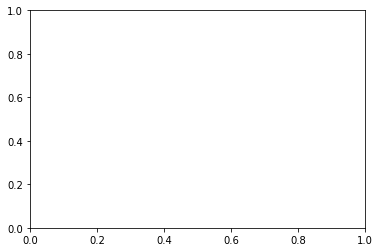

In [25]:
plt.plot(display)

In [ ]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))